# Decision Tree Classifier Study on Taiwan Credit Default Dataset
*Ben Perkins*
*08.14.2022*

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
%cd /content/gdrive/MyDrive/Github/ml-blog

/content/gdrive/MyDrive/Github/ml-blog


In [6]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd

In [2]:
filename = 'default of credit card clients.xls'

In [3]:
DATA = os.path.relpath('/content/gdrive/MyDrive/Github/ml-blog/credit/data/' + filename)

In [4]:
df = pd.read_excel(DATA, 'Data', index_col=[0], header=[1], na_values='NA')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
X = df.iloc[:, :22]
Y = df.iloc[:, 23]

In [6]:
X.head(), Y.head()

(    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
 ID                                                                         
 1       20000    2          2         1   24      2      2     -1     -1   
 2      120000    2          2         2   26     -1      2      0      0   
 3       90000    2          2         2   34      0      0      0      0   
 4       50000    2          2         1   37      0      0      0      0   
 5       50000    1          2         1   57     -1      0     -1      0   
 
     PAY_5  ...  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
 ID         ...                                                          
 1      -2  ...       3102        689          0          0          0   
 2       0  ...       1725       2682       3272       3455       3261   
 3       0  ...      14027      13559      14331      14948      15549   
 4       0  ...      48233      49291      28314      28959      29547   
 5       0  ...

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

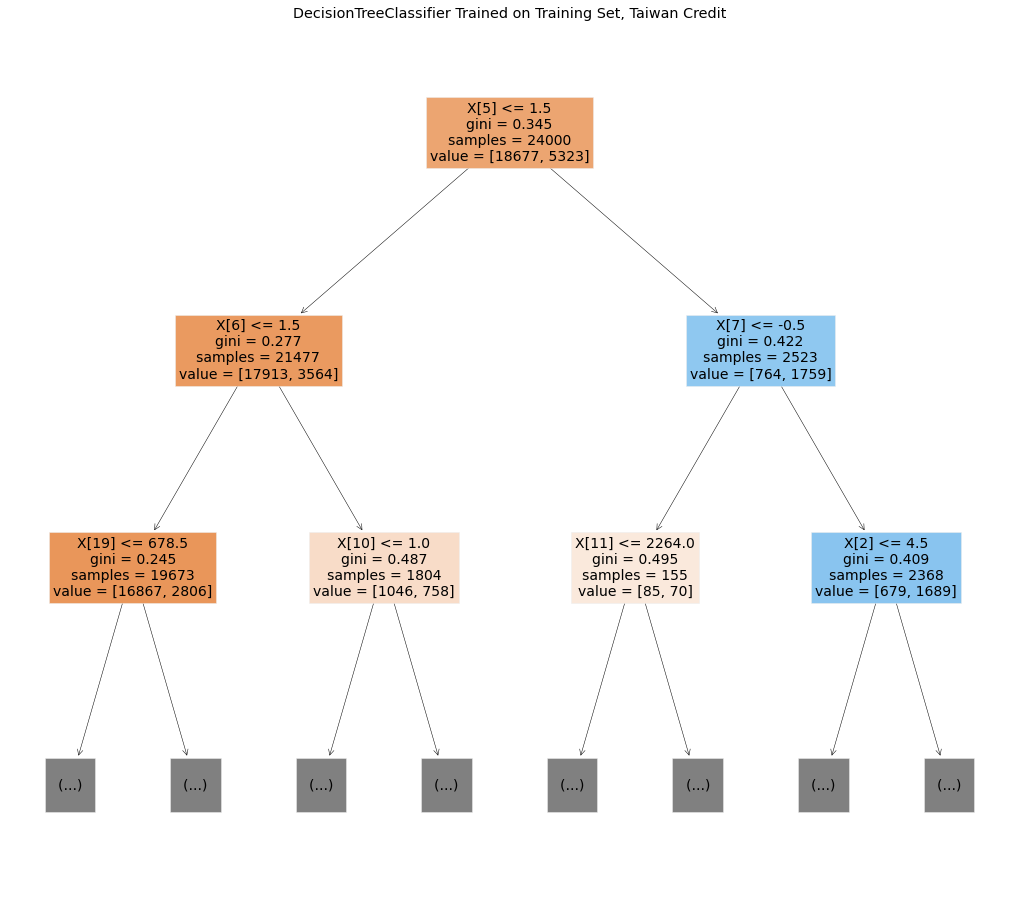

In [9]:
from sklearn import tree
plt.style.use('ggplot')
plt.figure(figsize=(18, 16))
tree.plot_tree(tree_clf, max_depth=2, filled=True, fontsize=14)
plt.title('DecisionTreeClassifier Trained on Training Set, Taiwan Credit')
plt.savefig('DTC_Taiwan_depth2.png')
plt.show()

In [10]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.00729795, 0.        , 0.        ,
       0.72666096, 0.14516789, 0.0120564 , 0.        , 0.02401265,
       0.00890667, 0.02100302, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00287132, 0.05053077,
       0.00149236, 0.        ])

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
y_pred = tree_clf.predict(X_test)

tree_acc = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy on Test Set: ', tree_acc)

Decision Tree Accuracy on Test Set:  0.821


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [14]:
confusion_matrix(y_test, y_pred)

array([[4453,  234],
       [ 840,  473]])

In [15]:
# Just to calculate the ratio of those instances covered by the main path to the whole

print(round(19673 / 24000, 4))

0.8197


In [16]:
tree_clf.classes_

array([0, 1])

In [17]:
tree_clf_bal = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
tree_clf_bal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

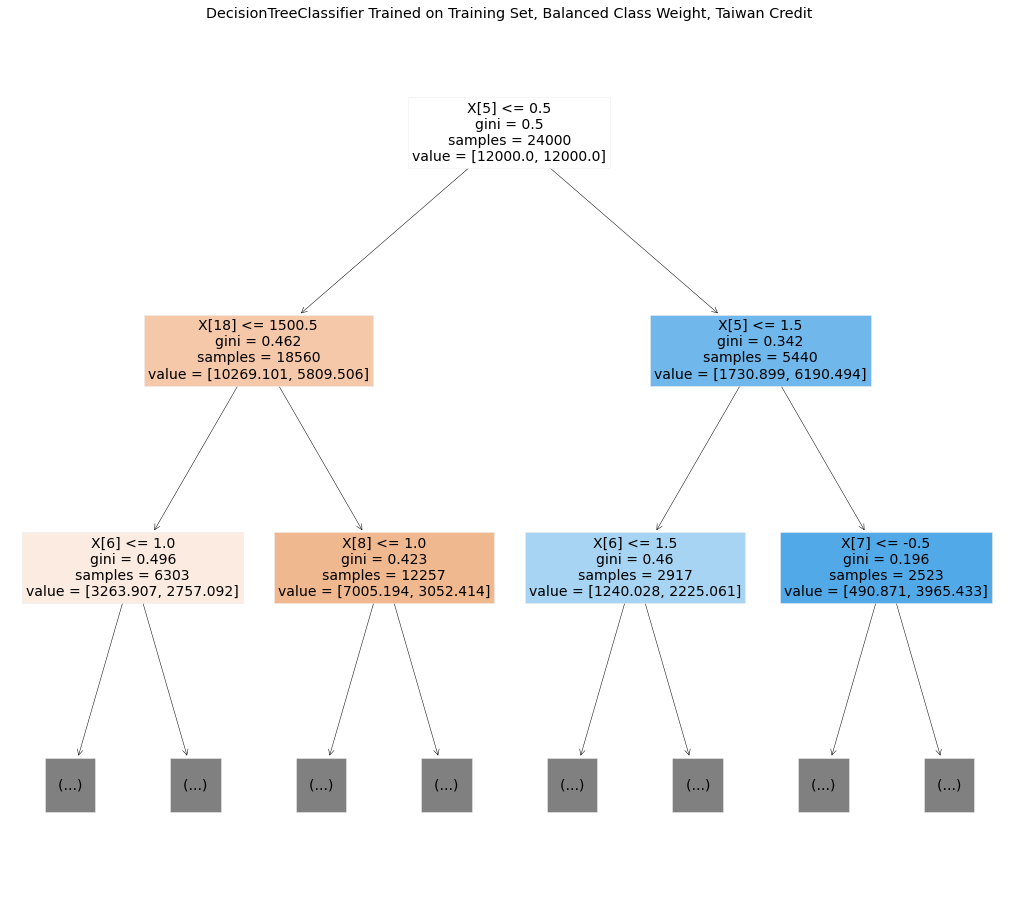

In [18]:
from sklearn import tree
plt.style.use('ggplot')
plt.figure(figsize=(18, 16))
tree.plot_tree(tree_clf_bal, max_depth=2, filled=True, fontsize=14)
plt.title('DecisionTreeClassifier Trained on Training Set, Balanced Class Weight, Taiwan Credit')
plt.savefig('DTC_Taiwan_depth2_bal.png')
plt.show()

In [19]:
y_pred_bal = tree_clf_bal.predict(X_test)

tree_acc_bal = accuracy_score(y_test, y_pred_bal)
print('Decision Tree Accuracy on Test Set: ', tree_acc_bal)

Decision Tree Accuracy on Test Set:  0.778
